In [3]:
import math

import matplotlib.pyplot as plt
import numpy as np
import os
import time

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import qiskit as qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ

import ramsey_experiment

# Loading your IBM Quantum account(s)
IBMQ.save_account(os.environ.get('IBM_KEY'), overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')



ibmqfactory.load_account:WARNING:2024-02-19 10:21:39,438: Credentials are already in use. The existing account in the session will be replaced.


In [51]:
import random
from Ramsey_ExperimentV2 import RamseyExperiment, RamseyBatch, complex_fit
from tqdm import tqdm

n = 1
times_fish = [0.14798028277614236, 0.5948984830862809]
Shots_fish = [4500, 5500]
times = [0.33]
Shots = [5000,5000]
delay = np.linspace(0, np.pi, 10)
shots = 1000
dist_w = []
dist_j = []
repetitions = 100


mean_w_dist_opt = []
mean_decay_dist_opt = []

mean_w_dist_uni = []
mean_decay_dist_uni = []
var = np.linspace(0.5, 7, 40)
for i in tqdm(range(repetitions), desc='repetitions'):
    dist_decay_opt = []
    dist_w_opt = []

    dist_decay_uni = []
    dist_w_uni = []

    dist_decay_uniform = []
    dist_w_uniform = []
    for v in var:
        # batch_opt = []
        batch_x = []
        batch_y = []
        batch_uni = []
        w = [np.abs(random.gauss(v, 0)) for _ in range(n)]
        decay = [np.abs(random.gauss(v, 0)) for _ in range(n)]
        # w = [v]
        # decay = [v]
        #j = []
        for i in range(len(times)):
            # exp_opt = RamseyExperiment(n, times[i], Shots[i], [0]*n, w, decay)
            # exp_opt.create_circuit_detuning()
            # exp_opt.add_decay_raw()
            # batch_opt.append(exp_opt)
            exp_x = RamseyExperiment(n, times[i], Shots[i], [0]*n, w, decay, basis='X')
            exp_x.create_circuit_detuning()
            exp_x.add_decay_raw()
            batch_x.append(exp_x)
            exp_y = RamseyExperiment(n, times[i], Shots[i], [0]*n, w, decay, basis='Y')
            exp_y.create_circuit_detuning()
            exp_y.add_decay_raw()
            batch_y.append(exp_y)


        for i in range(len(times_fish)):
            exp_uni = RamseyExperiment(n, times_fish[i], Shots_fish[i], [0]*n, w, decay)
            exp_uni.create_circuit_detuning()
            exp_uni.add_decay_raw()
            batch_uni.append(exp_uni)

        # batch_opt = RamseyBatch(batch_opt)
        batch_x = RamseyBatch(batch_x)
        batch_y = RamseyBatch(batch_y)
        # params_opt = batch_opt.fit_to_theory()
        params_opt = complex_fit(batch_x, batch_y)
        W_fit_opt = [params_opt[i][1] for i in range(n)]
        decay_fit_opt = [params_opt[i][0] for i in range(n)]

        batch_uni = RamseyBatch(batch_uni)
        params_uni = batch_uni.fit_to_theory()
        W_fit_uni = [params_uni[i][1] for i in range(n)]
        decay_fit_uni = [params_uni[i][0] for i in range(n)]

        dist_w_opt.append(batch_uni.calc_dist(W_fit_opt, w))
        dist_decay_opt.append(batch_uni.calc_dist(decay_fit_opt, decay))

        dist_w_uni.append(batch_uni.calc_dist(W_fit_uni, w))
        dist_decay_uni.append(batch_uni.calc_dist(decay_fit_uni, decay))

    mean_w_dist_opt.append(dist_w_opt)
    mean_decay_dist_opt.append(dist_decay_opt)

    mean_w_dist_uni.append(dist_w_uni)
    mean_decay_dist_uni.append(dist_decay_uni)




repetitions:   0%|          | 0/100 [00:00<?, ?it/s]C:\Projects\Crosstalk\Ramsey_ExperimentV2.py:522: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess)
C:\Projects\Crosstalk\Ramsey_ExperimentV2.py:450: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, x_points, y_points, p0=initial_guess)
repetitions: 100%|██████████| 100/100 [04:09<00:00,  2.50s/it]


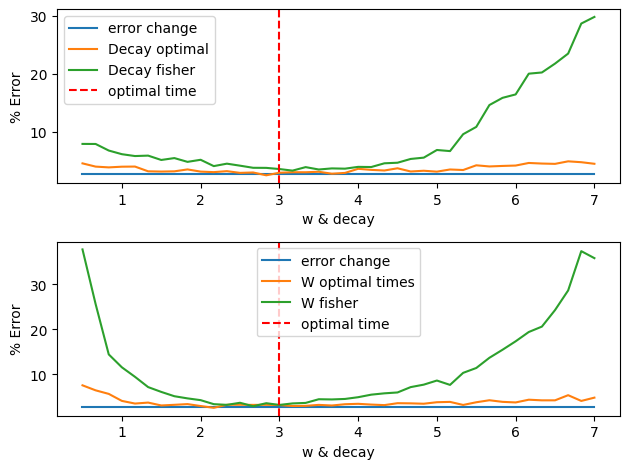

In [54]:
import matplotlib.pyplot as plt
w_dist_reshaped = list(map(list, zip(*mean_w_dist_opt)))
w_error_opt = [np.mean(np.array(w_dist_reshaped[i])) for i in range(len(w_dist_reshaped))]
w_std_opt = [np.std(np.array(w_dist_reshaped[i])) for i in range(len(w_dist_reshaped))]

decay_dist_reshaped = list(map(list, zip(*mean_decay_dist_opt)))
decay_error_opt = [np.mean(np.array(decay_dist_reshaped[i])) for i in range(len(decay_dist_reshaped))]
decay_std_opt = [np.std(np.array(decay_dist_reshaped[i])) for i in range(len(decay_dist_reshaped))]

w_dist_reshaped = list(map(list, zip(*mean_w_dist_uni)))
w_error_uni = [np.mean(np.array(w_dist_reshaped[i])) for i in range(len(w_dist_reshaped))]
w_std_uni = [np.std(np.array(w_dist_reshaped[i])) for i in range(len(w_dist_reshaped))]

decay_dist_reshaped = list(map(list, zip(*mean_decay_dist_uni)))
decay_error_uni = [np.mean(np.array(decay_dist_reshaped[i])) for i in range(len(decay_dist_reshaped))]
decay_std_uni = [np.std(np.array(decay_dist_reshaped[i])) for i in range(len(decay_dist_reshaped))]


#plt.title('10 measurements, T = pi 1000 shots')


fig, axs = plt.subplots(2)

sigma = 1
error_change = lambda v : np.e / np.sqrt(np.sum(Shots)) * 100
axs[0].plot(var, [error_change(v) for v in var], label='error change')
axs[1].plot(var, [error_change(v) for v in var], label='error change')
# Plot for decay comparison
axs[0].plot(var, decay_error_opt, label='Decay optimal')
axs[0].plot(var, decay_error_uni, label='Decay fisher')
axs[0].axvline(x=3, color='red', linestyle='--', label='optimal time')
axs[0].set_xlabel('w & decay')
axs[0].set_ylabel('% Error')
axs[0].legend()

# Plot for w comparison
axs[1].plot(var, w_error_opt, label='W optimal times')
axs[1].plot(var, w_error_uni, label='W fisher')
axs[1].axvline(x=3, color='red', linestyle='--', label='optimal time')
axs[1].set_xlabel('w & decay')
axs[1].set_ylabel('% Error')
axs[1].legend()

# axs[0].set_ylim([0, 30])
# axs[1].set_ylim([0, 30])

plt.tight_layout()
plt.show()


# plt.errorbar(var, decay_error_opt, yerr=decay_std_opt, fmt='o', label='Decay optimal')
# plt.errorbar(var, w_error_opt, yerr=w_std_opt, fmt='o', label='W optimal times')

# plt.errorbar(var, decay_error_uni, yerr=decay_std_uni, fmt='o', label='Decay uniform')
# plt.errorbar(var, w_error_uni, yerr=w_std_uni, fmt='o', label='W uniform')
# plt.axvline(x=3, color='red', linestyle='--', label='optimal time')


# plt.plot(var, [error_change(v) for v in var], label='error change')
#plt.ylim([0,20])
#plt.errorbar(measurements, j_error, yerr=j_std, fmt='o', label='J')
#lt.semilogy()
#plt.ylim([0,50])

In [25]:
import pandas as pd

w_df = pd.DataFrame({'w_dist_reshaped': w_dist_reshaped, 'w_error': w_error, 'w_std' : w_std})
decay_df = pd.DataFrame({'decay_dist_reshaped': decay_dist_reshaped, 'decay_error': decay_error, 'decay_std' : decay_std})
j_df = pd.DataFrame({'j_dist_reshaped': j_dist_reshaped, 'j_error': j_error, 'j_std' : j_std})

# Save the DataFrame to an Excel file
excel_path = 'results/w_df_2_optimal_times.xlsx'
w_df.to_excel(excel_path, index=False)

excel_path = 'results/decay_df_2_optimal_times.xlsx'
decay_df.to_excel(excel_path, index=False)

excel_path = 'results/j_df_2_optimal_times.xlsx'
j_df.to_excel(excel_path, index=False)